# Data Analysis with CSVs

In this lesson, we'll complete a full data analysis with a raw data file. **Comma Separated Values** files, known as CSVs, are one of the most common file formats for storing tabular data. In this lesson, we'll show you how to load one into memory and work with it using Python.

# Objectives

Perform a complete data analysis by...

- Creating a Python data structure from a .csv file
- Exploring and cleaning the data 
- Conducting descriptive analysis
- Visualizing the results

# Loading a CSV

The before you can work with a CSV file, you need to load it into memory.

We'll be working with food data! Data source: https://www.kaggle.com/datasets/openfoodfacts/world-food-facts (version we're using has been lightly cleaned and edited for clarity, and because we don't need all 163 columns)

## First up - to the Terminal!

## Get the File Path

Make sure you have the path to your data file. For this example, it is in the root folder of this repository.

Open a new Terminal window (one that doesn't have Jupyter running) and check out the _relative_ location and path between this notebook and the `OpenFoodFacts.csv` data file.

Now, let's save that relative path here, as a string variable.

We use `.` to indicate the root folder of the repository when working within this notebook.

In [1]:
csv_file_path = './data/OpenFoodFacts.csv'

## Inspecting CSV files

In a CSV file, each line represents one row of tabular data, and consecutive values in that row are separated by a comma. Often, the first row contains the column names separated by commas, also known as field names. Let's confirm that this is the case and learn about our dataset by printing the first five lines of the file.

We can inspect the data directly in our terminal! Use the bash command `head` with the flag `-n 5` to check out those first two rows.

### Printing Lines in Python

We use the `with open()` syntax to easily open and read the file in the notebook. Using this syntax will automatically close the file once the statement is done running.

In [2]:
# This code prints the first line of the CSV file

with open(csv_file_path) as csvfile:
    print(csvfile.readline())

product_name,brands,created_date,last_modified_date,serving_size,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g



Next, we can print the second line to look at an example of one observation from our dataset. 

In [3]:
# This code prints the second line of the CSV file

with open(csv_file_path) as csvfile:
    csvfile.readline()
    print(csvfile.readline())

Banana Chips Sweetened (Whole),,2017-03-09,2017-03-09,28.0 g,2243.0,28.57,64.29,14.29,3.57



### Discussion

Based on these two lines, what can we infer about the contents of the data file? What questions arise for you about the data?

- 


## Using the `csv` module

The [`csv` module](https://docs.python.org/3/library/csv.html) lets us easily process data in CSV files. We will use it to read each row in the `.csv` file and store its information in a Python object we can use for further analysis. 

In [4]:
import csv

The [`csv.DictReader`](https://docs.python.org/3/library/csv.html#csv.DictReader) object is a file reader, reading each row and then converting it to a dictionary. By default, it turns each row into a dictionary, using the field names from the first row as the keys.

In [5]:
# Print OrderedDict from first row of CSV file 

with open(csv_file_path) as csvfile:
    reader = csv.DictReader(csvfile)
    print(next(reader))

{'product_name': 'Banana Chips Sweetened (Whole)', 'brands': '', 'created_date': '2017-03-09', 'last_modified_date': '2017-03-09', 'serving_size': '28.0 g', 'energy_100g': '2243.0', 'fat_100g': '28.57', 'carbohydrates_100g': '64.29', 'sugars_100g': '14.29', 'proteins_100g': '3.57'}


Let's get all of the data out of our file and into dictionaries, and store those dictionaries in a new list called `products`.

In [6]:
products = []

with open(csv_file_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        products.append(row)

In [7]:
# Now look at the first 3 entries
products[0:3]

[{'product_name': 'Banana Chips Sweetened (Whole)',
  'brands': '',
  'created_date': '2017-03-09',
  'last_modified_date': '2017-03-09',
  'serving_size': '28.0 g',
  'energy_100g': '2243.0',
  'fat_100g': '28.57',
  'carbohydrates_100g': '64.29',
  'sugars_100g': '14.29',
  'proteins_100g': '3.57'},
 {'product_name': 'Peanuts',
  'brands': 'Torn & Glasser',
  'created_date': '2017-03-09',
  'last_modified_date': '2017-03-09',
  'serving_size': '28.0 g',
  'energy_100g': '1941.0',
  'fat_100g': '17.86',
  'carbohydrates_100g': '60.71',
  'sugars_100g': '17.86',
  'proteins_100g': '17.86'},
 {'product_name': 'Organic Salted Nut Mix',
  'brands': 'Grizzlies',
  'created_date': '2017-03-09',
  'last_modified_date': '2017-03-09',
  'serving_size': '28.0 g',
  'energy_100g': '2540.0',
  'fat_100g': '57.14',
  'carbohydrates_100g': '17.86',
  'sugars_100g': '3.57',
  'proteins_100g': '17.86'}]

# Data Preparation

Now that we've gotten all of our data into a Python object, we can prepare it for analysis. Let's look at a sample observation and consider how we might want to process it to make it easier to analyze.

In [8]:
products[0]

{'product_name': 'Banana Chips Sweetened (Whole)',
 'brands': '',
 'created_date': '2017-03-09',
 'last_modified_date': '2017-03-09',
 'serving_size': '28.0 g',
 'energy_100g': '2243.0',
 'fat_100g': '28.57',
 'carbohydrates_100g': '64.29',
 'sugars_100g': '14.29',
 'proteins_100g': '3.57'}

**Discussion:** How might you clean these entries to make them easier to analyze?

- 


## Clean the Serving Size (and other numbers)

You might have noticed that all of these numbers are strings! Hard to do things like math on strings.

In addition, the `serving_size` here has ` g` at the end - in fact, I know from doing more analysis on this data that ALL of these are in grams, and have ` g` at the end. Let's remove that so we can treat those as numbers too!

In [17]:
# First, let's do a one off example - how to we turn a string into a float?
float(products[0]['sugars_100g'])

14.29

In [18]:
# And how can we remove the ' g' from the end of the serving sizes?
float(products[0]['serving_size'].strip(" g"))

28.0

In [19]:
# Now that we've figured out what to do, let's clean up these dicts!
for product in products:
    # Clean up serving size
    product['serving_size_g'] = float(product['serving_size'].strip(" g"))

    # Clean up all the values if the key contains "100g"
    for key, detail in product.items():
        if '100g' in key:
            # now - we have some blanks in here!
            # introducing: try / except!
            try: # tries to do this first thing
                product[key] = float(detail)
            except: # does this if the first thing doesn't work
                product[key] = 0.0

In [20]:
# Check it out:
products[0]

{'product_name': 'Banana Chips Sweetened (Whole)',
 'brands': '',
 'created_date': '2017-03-09',
 'last_modified_date': '2017-03-09',
 'serving_size': '28.0 g',
 'energy_100g': 2243.0,
 'fat_100g': 28.57,
 'carbohydrates_100g': 64.29,
 'sugars_100g': 14.29,
 'proteins_100g': 3.57,
 'serving_size_g': 28.0,
 'created_year': 2017,
 'created_month': 3}

## Clean the Dates

Next we'll clean the dates so that we can easily get the month and year when each food was added to this database.

### Using Python built-in methods

**Activity**: Process the `products` list to add numeric values for the month and year when each entry was first created! (aka parse out `created_date`)

In [21]:
# Your work here
for product in products:
    # Save the date to a variable
    string_date = product["created_date"]

    # Extract the sale year and month from the string, and cast to int
    created_year = int(string_date[0:4])
    created_month = int(string_date[5:7])    

    # Add the sale year and month to each dictionary element of sales
    product["created_year"] = created_year
    product["created_month"] = created_month

<details>
    <summary><b><u>Click Here for Answer Code</u></b></summary>
    
```python    
for product in products[:10]:
    # Save the date to a variable
    string_date = product["created_date"]

    # Extract the sale year and month from the string, and cast to int
    created_year = int(string_date[0:4])
    created_month = int(string_date[5:7])    

    # Add the sale year and month to each dictionary element of sales
    product["created_year"] = created_year
    product["created_month"] = created_month
```
</details>

In [22]:
products[0]

{'product_name': 'Banana Chips Sweetened (Whole)',
 'brands': '',
 'created_date': '2017-03-09',
 'last_modified_date': '2017-03-09',
 'serving_size': '28.0 g',
 'energy_100g': 2243.0,
 'fat_100g': 28.57,
 'carbohydrates_100g': 64.29,
 'sugars_100g': 14.29,
 'proteins_100g': 3.57,
 'serving_size_g': 28.0,
 'created_year': 2017,
 'created_month': 3}

# Data Analysis

Now that you have a cleaner version of the data, we can finally start to perform some data analysis.

## Question 1: What is the range of years for which we have data?

In [23]:
# Your work here


<details>
            <summary><b><u>Answer</u></b></summary>

```python
years = [product['created_year'] for product in products]
print(min(years))
print(max(years))
```    
</details>

## Question 2: What is the average number of calories per 100g for all of these foods?

In [24]:
# Your work here


<details>
            <summary><b><u>Answer</u></b></summary>

```python
cals = [product['energy_100g'] for product in products]

sum(cals) / len(cals)
```
</details>

## Question 3: What is the average amount of sugar per 100g in foods that are more than 1000 calories per 100g?

In [25]:
# Your work here


<details>
            <summary><b><u>Answer</u></b></summary>

```python
prods_over_1000cal = [product for product in products if product['energy_100g'] > 1000]
sugar = [product['sugars_100g'] for product in prods_over_1000cal]
sum(sugar) / len(sugar)
```
</details>

## Question 4: How many foods were added (created) in each year?

In [26]:
# Your work here


<details>
            <summary><b><u>Answer</u></b></summary>

```python
prod_year_count = {}
list_created_years = [product['created_year'] for product in products]
unique_prod_years = set(list_created_years)
for unique_year in unique_prod_years:
    num_added = len([year for year in list_created_years if year == unique_year])
    prod_year_count[unique_year] = num_added
    
prod_year_count
```
</details>

# Chart the Data

This rendering of the data directly in the notebook is helpful, but it takes a lot of effort to read it and make sense of the trends - let's visualize the results to make this easier.

In [27]:
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


NameError: name 'prod_year_count' is not defined

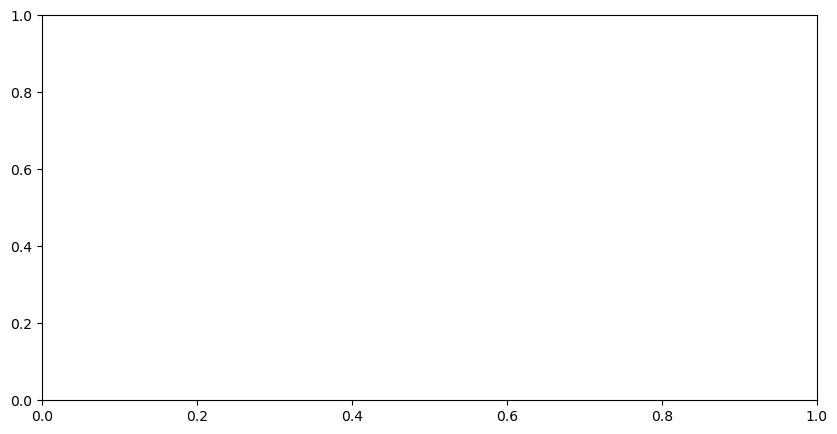

In [28]:
# create a figure and one plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# place data in a bar chart
# where the x-axis is each year and
# the y-axis is the number of products added per year
ax.bar(prod_year_count.keys(),
       prod_year_count.values())

# set axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Number of Products Added")

# give the bar chart a title
ax.set_title("Foods Added to the Open Food Facts Database")

# display bar chart clearly
fig.tight_layout()

# Level Up: `Counter`

The `collections` package has a lot of useful tools for working with Python objects containing multiple elements. You can use the `Counter` class to easily count the number of values in a list.

For example, let's say that for all dictionaries in `sales`, we want to count how many property sales occured in each year. 

In [ ]:
from collections import Counter

prod_year_count = Counter([product['created_year'] for product in products])
prod_year_count

Let's sort these by year. Since the value in `sale_year` is an integer, we can use Python's built-in [`sorted`](https://docs.python.org/3/library/functions.html#sorted) function to transform the `Counter` object into a `list` of `tuples` - `(year, count)` which are sorted in ascending order by year.

In [ ]:
prod_year_count = sorted(prod_year_count.items())
prod_year_count

# Level Up: Using `datetime`

Python has a [`datetime`](https://docs.python.org/3.7/library/datetime.html) package that is the standard tool for handling dates and times. `datetime` objects make it easy to do fun things like subtract dates to calculate how far apart they are.

In [ ]:
from datetime import datetime

In [ ]:
for product in products:
    # Transform DocumentDate from string to datetime
    product["clean_date"] = datetime.strptime(product["last_modified_date"], 
                                           "%Y-%m-%d")
    
    # Add the sale year and month to each dictionary element of sales
    product["last_modified_year"] = product["clean_date"].year
    product["last_modified_month"] = product["clean_date"].month

Let's inspect our work

In [ ]:
products[0]